# **Problem Statement**

- Telecom companies experience significant revenue loss due to customer churn. This dataset aims to identify the key factors driving customer churn and build a predictive model to identify customers at high risk of churning.

# **Objectives**

- Analyze customer churn patterns : Explore the dataset to understand the prevalence of churn, identify demographic trends, and analyze the relationship between churn and various customer attributes.

- Identify key drivers of churn : Determine the factors that significantly contribute to customer churn, such as specific services, contract types, billing preferences, or demographic characteristics.

- Develop a predictive model : Build a machine learning model that accurately predicts the likelihood of a customer churning based on their individual characteristics and service usage patterns.

Predict the customer will churn or not using the data.

- customerID : Unique identifier for each customer.

- gender : Customer's gender (likely Male/Female).

- SeniorCitizen : Whether the customer is a senior citizen (0/1).

- Partner : Whether the customer has a partner (Yes/No).

- Dependents : Whether the customer has dependents (Yes/No).

- tenure : How long the customer has been with the company (in months).

- PhoneService : Whether the customer has phone service (Yes/No).

- MultipleLines : Whether the customer has multiple phone lines (Yes/No/No phone service).

- InternetService :	Customer's internet service type (DSL/Fiber optic/No).

- OnlineSecurity : Whether the customer has online security (Yes/No/No
internet service).

- OnlineBackup : Whether the customer has online backup (Yes/No/No internet service).

- DeviceProtection : Whether the customer has device protection (Yes/No/No internet service).

- TechSupport :	Whether the customer has tech support (Yes/No/No internet service).

- StreamingTV : Whether the customer has streaming TV (Yes/No/No internet service).

- StreamingMovies : Whether the customer has streaming movies (Yes/No/No internet service).

- Contract : Customer's contract type (Month-to-month/One year/Two year).

- PaperlessBilling : Whether the customer has paperless billing (Yes/No).

- PaymentMethod : Customer's payment method (Electronic check/Mailed checkBank transfer (automatic)/Credit card (automatic)).

- MonthlyCharges : Amount charged to the customer monthly.

- TotalCharges : Total amount charged to the customer.

- Churn : Whether the customer churned (Yes/No).

# Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understand the Data

In [48]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Descriptive Statistics

In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Visualisation

Text(0.5, 0.98, 'Histogram of Dataset')

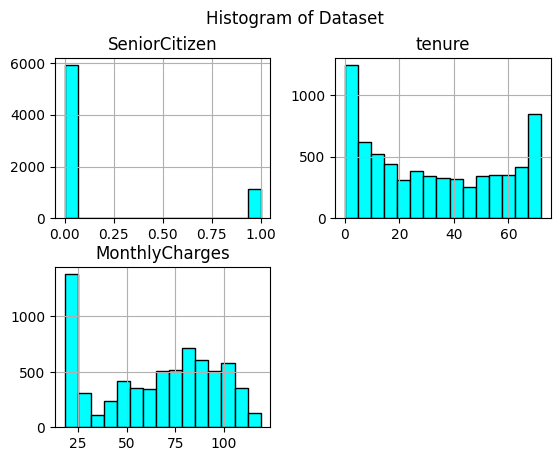

In [55]:
df.hist(color='cyan',edgecolor='k',bins=15)
plt.suptitle('Histogram of Dataset')

In [56]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [57]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [58]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)

<ipython-input-58-3e2632a666ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(['Male','Female'],[0,1],inplace=True)
<ipython-input-58-3e2632a666ba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(['Male','Female'],[0,1],inplace=True)


In [59]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [60]:
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)

<ipython-input-60-e21b6c981640>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
<ipython-input-60-e21b6c981640>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'].replace(['Month-to-month','One year',

In [61]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [63]:
df['customerID']=le.fit_transform(df['customerID'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['Churn']=le.fit_transform(df['Churn'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [64]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


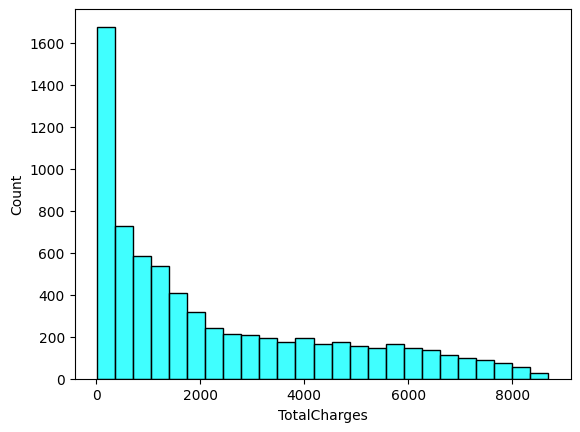

In [66]:
sns.histplot(df['TotalCharges'],edgecolor='k',color='cyan')
plt.show()

In [67]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

<ipython-input-67-9c0f9f00c74e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [69]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


# Imbalanced Data to Oversampling

In [70]:
from imblearn.over_sampling import SMOTE

X=df.drop('Churn',axis=1)
y=df['Churn']

smote=SMOTE()

X_resampled,y_resampled=smote.fit_resample(X,y)

df=pd.concat([X_resampled,y_resampled],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10348 non-null  int64  
 1   gender            10348 non-null  int64  
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  int64  
 4   Dependents        10348 non-null  int64  
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  int64  
 7   MultipleLines     10348 non-null  int64  
 8   InternetService   10348 non-null  int64  
 9   OnlineSecurity    10348 non-null  int64  
 10  OnlineBackup      10348 non-null  int64  
 11  DeviceProtection  10348 non-null  int64  
 12  TechSupport       10348 non-null  int64  
 13  StreamingTV       10348 non-null  int64  
 14  StreamingMovies   10348 non-null  int64  
 15  Contract          10348 non-null  int64  
 16  PaperlessBilling  10348 non-null  int64 

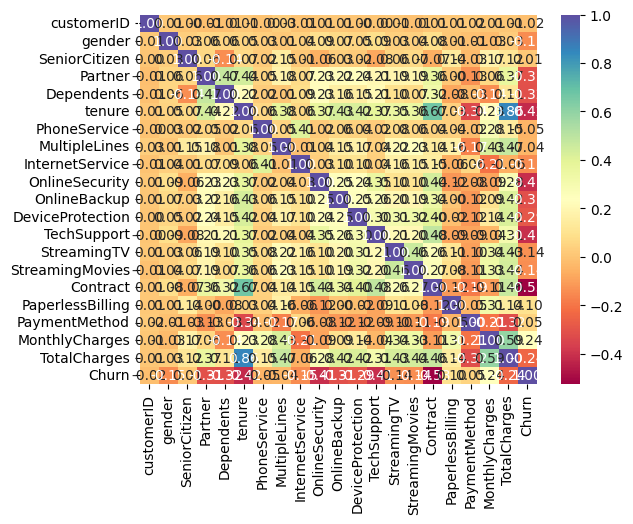

In [72]:
corr_df=df.corr()

sns.heatmap(corr_df,annot=True,fmt='0.2f',cmap='Spectral')

plt.show()

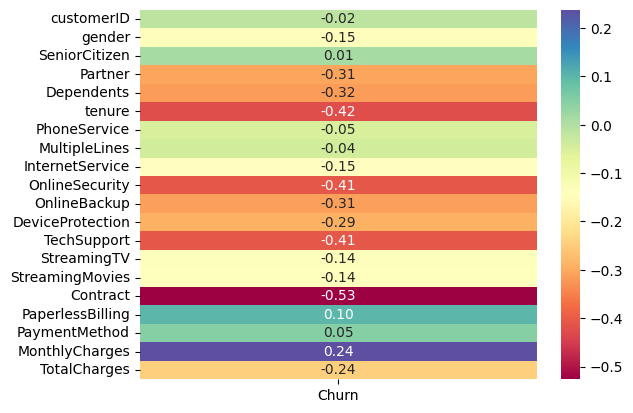

In [73]:
churn_corr=df.corr()['Churn']
churn_corr=churn_corr.drop('Churn')

sns.heatmap(churn_corr.to_frame(),annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [74]:
df.drop('customerID',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('SeniorCitizen',axis=1,inplace=True)
df.drop('PhoneService',axis=1,inplace=True)
df.drop('MultipleLines',axis=1,inplace=True)
df.drop('InternetService',axis=1,inplace=True)
df.drop('StreamingTV',axis=1,inplace=True)
df.drop('StreamingMovies',axis=1,inplace=True)
df.drop('PaperlessBilling',axis=1,inplace=True)
df.drop('PaymentMethod',axis=1,inplace=True)
df.drop('MonthlyCharges',axis=1,inplace=True)
df.drop('TotalCharges',axis=1,inplace=True)

In [75]:
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,1,0,1,0,2,0,0,0,0
1,0,0,34,2,0,2,0,1,0
2,0,0,2,2,2,0,0,0,1
3,0,0,45,2,0,2,2,1,0
4,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10343,1,0,40,0,1,0,1,0,1
10344,0,0,1,0,0,0,0,0,1
10345,1,0,11,0,1,0,0,0,1
10346,1,0,40,0,1,1,0,0,1


# Skewness Detection

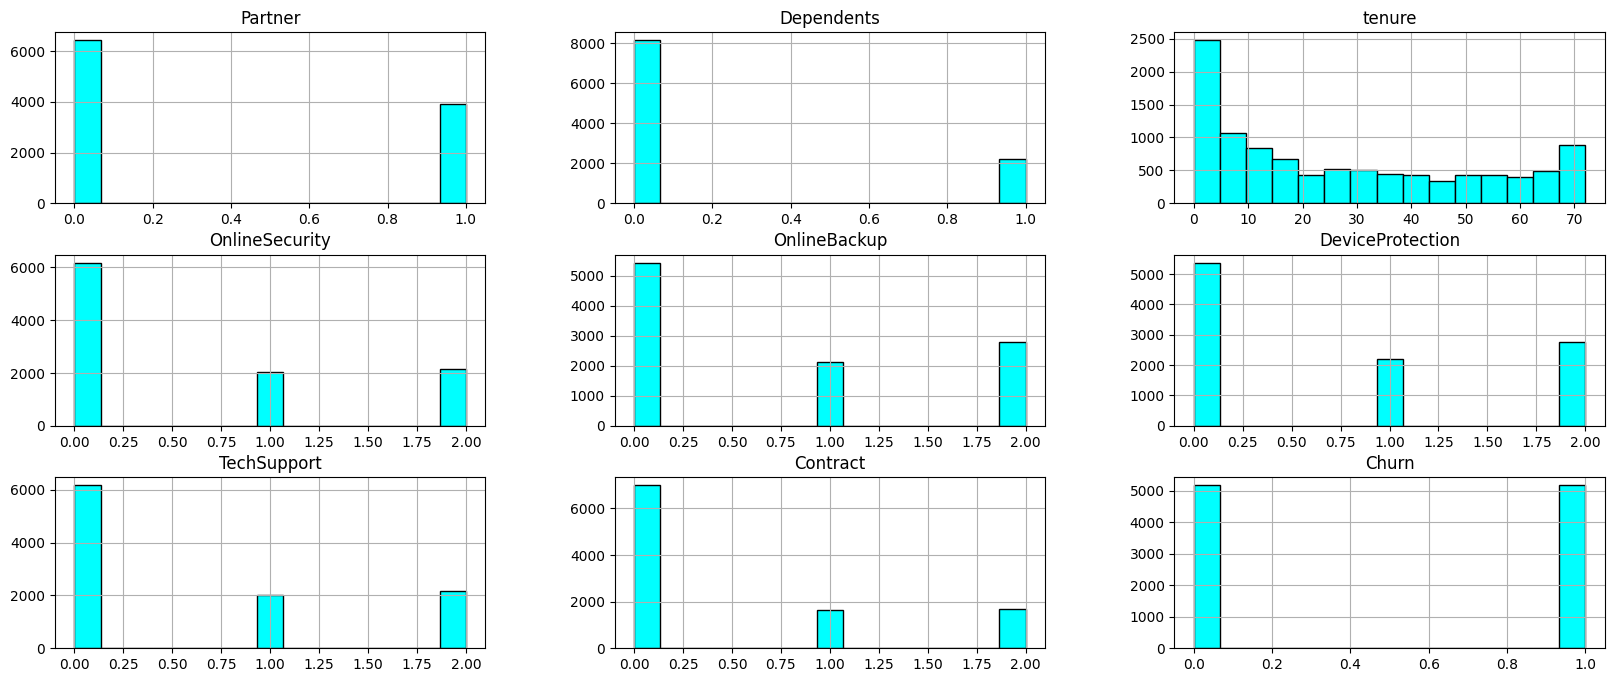

In [76]:
df.hist(figsize=(20,8),bins=15,edgecolor='k',color='cyan')
plt.show()

In [77]:
df['tenure']=np.log1p(df['tenure'])

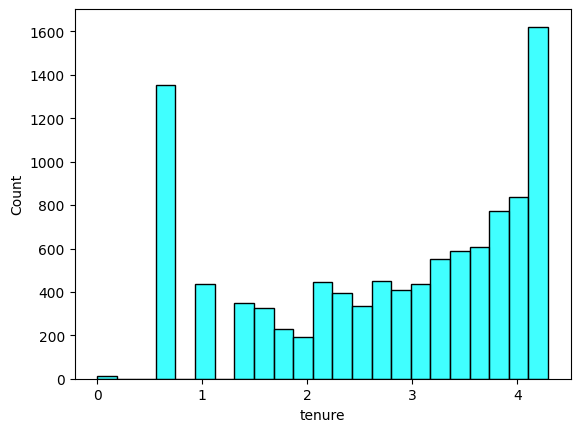

In [78]:
sns.histplot(df['tenure'],color='cyan',edgecolor='k')
plt.show()

# Outlier Detection

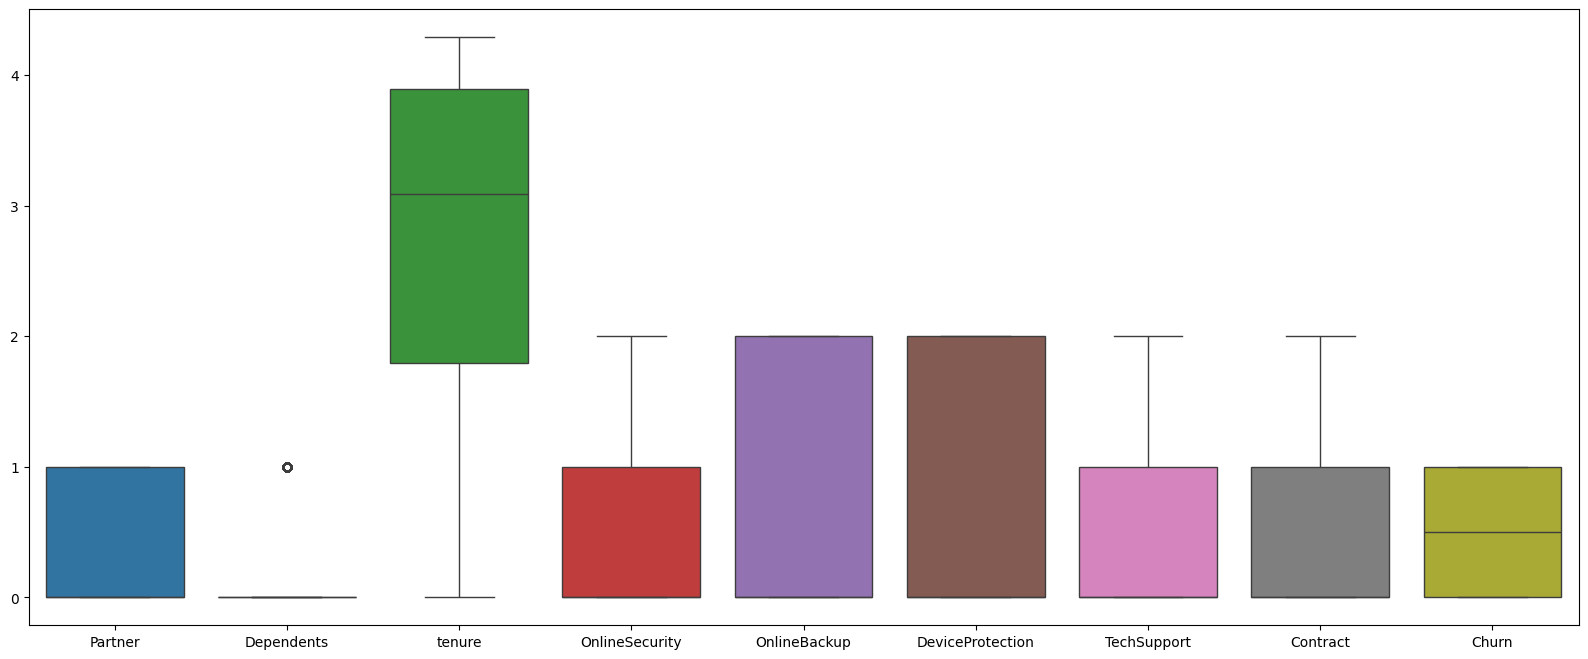

In [79]:
plt.figure(figsize=(20,8))
sns.boxplot(df)
plt.show()

In [80]:
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,1,0,0.693147,0,2,0,0,0,0
1,0,0,3.555348,2,0,2,0,1,0
2,0,0,1.098612,2,2,0,0,0,1
3,0,0,3.828641,2,0,2,2,1,0
4,0,0,1.098612,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10343,1,0,3.713572,0,1,0,1,0,1
10344,0,0,0.693147,0,0,0,0,0,1
10345,1,0,2.484907,0,1,0,0,0,1
10346,1,0,3.713572,0,1,1,0,0,1


# Data Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler

features=['Partner','Dependents','tenure','OnlineBackup','DeviceProtection','TechSupport','Contract','Churn']

scaler=MinMaxScaler()

scaled_df=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_df,columns=features,index=df.index)

In [82]:
df=scaled_df
df

,Partner,Dependents,tenure,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,1.0,0.0,0.161555,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.828664,0.0,1.0,0.0,0.5,0.0
2,0.0,0.0,0.256059,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.892362,0.0,1.0,1.0,0.5,0.0
4,0.0,0.0,0.256059,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
10343,1.0,0.0,0.865542,0.5,0.0,0.5,0.0,1.0
10344,0.0,0.0,0.161555,0.0,0.0,0.0,0.0,1.0
10345,1.0,0.0,0.579170,0.5,0.0,0.0,0.0,1.0
10346,1.0,0.0,0.865542,0.5,0.5,0.0,0.0,1.0


# Initial Modeling

In [83]:
from sklearn.model_selection import train_test_split

X=df.drop('Churn',axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [84]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred=model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)

print('Accuracy_score :',accuracy_score)
print('CLassification_report :',classification_report)

Accuracy_score : 0.7821256038647343
CLassification_report :               precision    recall  f1-score   support

         0.0       0.84      0.70      0.76      1021
         1.0       0.75      0.87      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070

